### 기본 라이브러리 설정

In [1]:
# 라이브러리 정의 import tensorflow.keras
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [2]:
import warnings

In [3]:
warnings.filterwarnings(action="ignore")

### 1~2. 데이터 불러오기 및 분리

In [4]:
# 데이터 불러오기 및 정렬
featureData = pd.read_csv('../dataset/feature_regression_example.csv')
sortKey = ["REGIONID","PRODUCTGROUP","PRODUCT","ITEM","YEARWEEK"]
featureData = featureData.sort_values(sortKey)

# 숫자형 컬럼 생성
featureData["HOLIDAY_YN"] = np.where(featureData.HOLIDAY=="Y",1,0)
featureData["PROMOTION_YN"] = np.where(featureData.PROMOTION=="Y",1,0)

In [5]:
# 특정 주차 기준 분리
predictStd = 201630
train_dataset = featureData[featureData.YEARWEEK <= predictStd]
test_dataset = featureData[featureData.YEARWEEK > predictStd]

# 특정 주차 기준 분리
# predictStd = 201630
# train_dataset = featureData.query('YEARWEEK <= @predictStd')
# test_dataset = featureData.query('YEARWEEK > @predictStd’)

# 인덱스 초기화
train_dataset = train_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

# 답지 별도 분리
train_labels = train_dataset["QTY"]
test_labels = test_dataset["QTY"]

In [6]:
train_dataset.columns

Index(['REGIONID', 'PRODUCTGROUP', 'PRODUCT', 'ITEM', 'YEARWEEK', 'YEAR',
       'WEEK', 'QTY', 'HOLIDAY', 'HCLUS', 'PROMOTION', 'PRO_PERCENT',
       'HOLIDAY_YN', 'PROMOTION_YN'],
      dtype='object')

In [7]:
# feature / label 선정 다른 풀이
# label = ["QTY"]
# features = list(featuresData.select_dtypes(np.number).columns)
# features = list(set(features)-set(label))

In [8]:
features  = ["HCLUS","PRO_PERCENT",
             "HOLIDAY_YN","PROMOTION_YN"]

label = ['QTY']

In [9]:
trainingData_features = train_dataset[features]
trainingData_label = train_dataset[label]
testData_features = test_dataset[features]
testData_label = test_dataset[label]
testData_all = test_dataset

In [10]:
len(features)

4

### 3. 모델 생성

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
trainingData_features.shape

(83, 4)

In [13]:
model = Sequential()
### 4개의 feature 가 행으로 입력됨
model.add(Dense(8, activation='relu', input_shape=(len(features),)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

### 4. 모델 컴파일

In [14]:
#optimizer = keras.optimizers.RMSprop(0.001)
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error','mean_squared_error'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### 5. 모델 훈련

In [15]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

from datetime import datetime
import os

logdir = os.path.join("logs",datetime.now().strftime("%Y%m%d_%H%M%S"))
logdir

callback_list = [
    TensorBoard(log_dir=logdir, histogram_freq=1),
    EarlyStopping(monitor="val_loss", patience=100)
]

In [16]:
#더이상 에러율이 향상되지 않을 시 정지한다, 단 patience 옵션 유지(너무빨리 끝나는거 방지)
early_stopping_monitor = EarlyStopping(patience=500)
EPOCHS = 2000
#모델 훈련 (훈련/검증을 80%, 20%로 나눔)
history =model.fit(trainingData_features,
                   trainingData_label, 
                   validation_split=0.2, epochs= EPOCHS, callbacks=callback_list)

W1015 12:28:44.847483  7504 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 66 samples, validate on 17 samples
Epoch 1/2000
66/66 [==============================] - 0s 3ms/sample - loss: 1973619.0947 - mean_absolute_error: 1123.1387 - mean_squared_error: 1973619.1250 - val_loss: 1712138.8750 - val_mean_absolute_error: 1085.2323 - val_mean_squared_error: 1712138.8750
Epoch 2/2000
66/66 [==============================] - 0s 268us/sample - loss: 1973607.7992 - mean_absolute_error: 1123.1339 - mean_squared_error: 1973607.7500 - val_loss: 1712132.2500 - val_mean_absolute_error: 1085.2295 - val_mean_squared_error: 1712132.2500
Epoch 3/2000
66/66 [==============================] - 0s 197us/sample - loss: 1973597.6004 - mean_absolute_error: 1123.1293 - mean_squared_error: 1973597.6250 - val_loss: 1712125.6250 - val_mean_absolute_error: 1085.2262 - val_mean_squared_error: 1712125.6250
Epoch 4/2000
66/66 [==============================] - 0s 182us/sample - loss: 1973587.4318 - mean_absolute_error: 1123.1244 - mean_squared_error: 1973587.5000 - val_loss: 1712119

66/66 [==============================] - 0s 182us/sample - loss: 1972202.3011 - mean_absolute_error: 1122.4481 - mean_squared_error: 1972202.2500 - val_loss: 1710778.2500 - val_mean_absolute_error: 1084.5508 - val_mean_squared_error: 1710778.2500
Epoch 33/2000
66/66 [==============================] - 0s 181us/sample - loss: 1972133.7727 - mean_absolute_error: 1122.4143 - mean_squared_error: 1972133.8750 - val_loss: 1710714.5000 - val_mean_absolute_error: 1084.5184 - val_mean_squared_error: 1710714.5000
Epoch 34/2000
66/66 [==============================] - 0s 258us/sample - loss: 1972063.5284 - mean_absolute_error: 1122.3804 - mean_squared_error: 1972063.6250 - val_loss: 1710648.6250 - val_mean_absolute_error: 1084.4850 - val_mean_squared_error: 1710648.6250
Epoch 35/2000
66/66 [==============================] - 0s 212us/sample - loss: 1971993.0473 - mean_absolute_error: 1122.3457 - mean_squared_error: 1971993.1250 - val_loss: 1710581.1250 - val_mean_absolute_error: 1084.4504 - val_mea

66/66 [==============================] - 0s 287us/sample - loss: 1969136.5682 - mean_absolute_error: 1120.9725 - mean_squared_error: 1969136.5000 - val_loss: 1707777.3750 - val_mean_absolute_error: 1083.0751 - val_mean_squared_error: 1707777.3750
Epoch 64/2000
66/66 [==============================] - 0s 167us/sample - loss: 1969000.9242 - mean_absolute_error: 1120.9055 - mean_squared_error: 1969001.0000 - val_loss: 1707636.7500 - val_mean_absolute_error: 1083.0079 - val_mean_squared_error: 1707636.7500
Epoch 65/2000
66/66 [==============================] - 0s 242us/sample - loss: 1968848.5189 - mean_absolute_error: 1120.8352 - mean_squared_error: 1968848.5000 - val_loss: 1707471.2500 - val_mean_absolute_error: 1082.9320 - val_mean_squared_error: 1707471.2500
Epoch 66/2000
66/66 [==============================] - 0s 181us/sample - loss: 1968686.8996 - mean_absolute_error: 1120.7622 - mean_squared_error: 1968686.8750 - val_loss: 1707306.1250 - val_mean_absolute_error: 1082.8557 - val_mea

66/66 [==============================] - 0s 181us/sample - loss: 1957084.4821 - mean_absolute_error: 1114.9878 - mean_squared_error: 1957084.5000 - val_loss: 1695991.0000 - val_mean_absolute_error: 1077.0652 - val_mean_squared_error: 1695991.0000
Epoch 95/2000
66/66 [==============================] - 0s 182us/sample - loss: 1956415.0076 - mean_absolute_error: 1114.6667 - mean_squared_error: 1956415.0000 - val_loss: 1695383.5000 - val_mean_absolute_error: 1076.7549 - val_mean_squared_error: 1695383.5000
Epoch 96/2000
66/66 [==============================] - 0s 227us/sample - loss: 1955764.7727 - mean_absolute_error: 1114.3457 - mean_squared_error: 1955764.7500 - val_loss: 1694746.1250 - val_mean_absolute_error: 1076.4298 - val_mean_squared_error: 1694746.1250
Epoch 97/2000
66/66 [==============================] - 0s 167us/sample - loss: 1955096.5159 - mean_absolute_error: 1114.0065 - mean_squared_error: 1955096.5000 - val_loss: 1694098.0000 - val_mean_absolute_error: 1076.1013 - val_mea

66/66 [==============================] - 0s 197us/sample - loss: 1929326.6818 - mean_absolute_error: 1101.6816 - mean_squared_error: 1929326.6250 - val_loss: 1669171.8750 - val_mean_absolute_error: 1063.8674 - val_mean_squared_error: 1669171.8750
Epoch 126/2000
66/66 [==============================] - 0s 196us/sample - loss: 1928145.8333 - mean_absolute_error: 1101.1329 - mean_squared_error: 1928145.8750 - val_loss: 1668010.8750 - val_mean_absolute_error: 1063.3511 - val_mean_squared_error: 1668010.8750
Epoch 127/2000
66/66 [==============================] - 0s 257us/sample - loss: 1926940.3030 - mean_absolute_error: 1100.5460 - mean_squared_error: 1926940.3750 - val_loss: 1666807.7500 - val_mean_absolute_error: 1062.8158 - val_mean_squared_error: 1666807.7500
Epoch 128/2000
66/66 [==============================] - 0s 167us/sample - loss: 1925641.0303 - mean_absolute_error: 1099.9618 - mean_squared_error: 1925641.0000 - val_loss: 1665571.2500 - val_mean_absolute_error: 1062.2661 - val_

66/66 [==============================] - 0s 212us/sample - loss: 1884672.5909 - mean_absolute_error: 1080.7673 - mean_squared_error: 1884672.6250 - val_loss: 1626057.8750 - val_mean_absolute_error: 1044.5732 - val_mean_squared_error: 1626057.8750
Epoch 157/2000
66/66 [==============================] - 0s 181us/sample - loss: 1882954.7045 - mean_absolute_error: 1079.9307 - mean_squared_error: 1882954.6250 - val_loss: 1624298.1250 - val_mean_absolute_error: 1043.7781 - val_mean_squared_error: 1624298.1250
Epoch 158/2000
66/66 [==============================] - 0s 166us/sample - loss: 1881050.4545 - mean_absolute_error: 1079.0535 - mean_squared_error: 1881050.3750 - val_loss: 1622478.0000 - val_mean_absolute_error: 1042.9541 - val_mean_squared_error: 1622478.0000
Epoch 159/2000
66/66 [==============================] - 0s 196us/sample - loss: 1879155.5919 - mean_absolute_error: 1078.1412 - mean_squared_error: 1879155.6250 - val_loss: 1620622.1250 - val_mean_absolute_error: 1042.1145 - val_

66/66 [==============================] - 0s 181us/sample - loss: 1820714.1420 - mean_absolute_error: 1050.6783 - mean_squared_error: 1820714.0000 - val_loss: 1564389.6250 - val_mean_absolute_error: 1016.5807 - val_mean_squared_error: 1564389.6250
Epoch 188/2000
66/66 [==============================] - 0s 182us/sample - loss: 1818339.2983 - mean_absolute_error: 1049.6279 - mean_squared_error: 1818339.2500 - val_loss: 1562224.1250 - val_mean_absolute_error: 1015.7082 - val_mean_squared_error: 1562224.1250
Epoch 189/2000
66/66 [==============================] - 0s 181us/sample - loss: 1816154.0114 - mean_absolute_error: 1048.5557 - mean_squared_error: 1816154.0000 - val_loss: 1560045.7500 - val_mean_absolute_error: 1014.8304 - val_mean_squared_error: 1560045.7500
Epoch 190/2000
66/66 [==============================] - 0s 182us/sample - loss: 1813823.4375 - mean_absolute_error: 1047.4608 - mean_squared_error: 1813823.3750 - val_loss: 1557826.8750 - val_mean_absolute_error: 1013.9358 - val_

66/66 [==============================] - 0s 212us/sample - loss: 1740542.7812 - mean_absolute_error: 1011.9695 - mean_squared_error: 1740542.7500 - val_loss: 1487071.0000 - val_mean_absolute_error: 988.3589 - val_mean_squared_error: 1487071.0000
Epoch 219/2000
66/66 [==============================] - 0s 288us/sample - loss: 1737490.1970 - mean_absolute_error: 1010.4562 - mean_squared_error: 1737490.1250 - val_loss: 1484153.6250 - val_mean_absolute_error: 987.3272 - val_mean_squared_error: 1484153.6250
Epoch 220/2000
66/66 [==============================] - 0s 212us/sample - loss: 1734367.7652 - mean_absolute_error: 1008.9570 - mean_squared_error: 1734367.7500 - val_loss: 1481121.0000 - val_mean_absolute_error: 986.2522 - val_mean_squared_error: 1481121.0000
Epoch 221/2000
66/66 [==============================] - 0s 197us/sample - loss: 1731210.4318 - mean_absolute_error: 1007.4034 - mean_squared_error: 1731210.3750 - val_loss: 1478030.8750 - val_mean_absolute_error: 985.1542 - val_mean

66/66 [==============================] - 0s 167us/sample - loss: 1637508.1051 - mean_absolute_error: 962.5660 - mean_squared_error: 1637508.0000 - val_loss: 1388092.7500 - val_mean_absolute_error: 952.1846 - val_mean_squared_error: 1388092.7500
Epoch 250/2000
66/66 [==============================] - 0s 181us/sample - loss: 1634351.7045 - mean_absolute_error: 961.0062 - mean_squared_error: 1634351.7500 - val_loss: 1385107.7500 - val_mean_absolute_error: 951.0543 - val_mean_squared_error: 1385107.7500
Epoch 251/2000
66/66 [==============================] - 0s 211us/sample - loss: 1631239.0303 - mean_absolute_error: 959.4713 - mean_squared_error: 1631239.0000 - val_loss: 1382018.6250 - val_mean_absolute_error: 949.8815 - val_mean_squared_error: 1382018.6250
Epoch 252/2000
66/66 [==============================] - 0s 181us/sample - loss: 1627932.4186 - mean_absolute_error: 957.8431 - mean_squared_error: 1627932.3750 - val_loss: 1378789.0000 - val_mean_absolute_error: 948.6522 - val_mean_squ

66/66 [==============================] - 0s 181us/sample - loss: 1528228.2973 - mean_absolute_error: 908.3976 - mean_squared_error: 1528228.2500 - val_loss: 1283364.7500 - val_mean_absolute_error: 910.8814 - val_mean_squared_error: 1283364.7500
Epoch 281/2000
66/66 [==============================] - 0s 182us/sample - loss: 1524864.5379 - mean_absolute_error: 906.7357 - mean_squared_error: 1524864.5000 - val_loss: 1280041.1250 - val_mean_absolute_error: 909.5099 - val_mean_squared_error: 1280041.1250
Epoch 282/2000
66/66 [==============================] - 0s 287us/sample - loss: 1521238.2727 - mean_absolute_error: 904.9933 - mean_squared_error: 1521238.2500 - val_loss: 1276509.1250 - val_mean_absolute_error: 908.0483 - val_mean_squared_error: 1276509.1250
Epoch 283/2000
66/66 [==============================] - 0s 182us/sample - loss: 1517535.6212 - mean_absolute_error: 903.1104 - mean_squared_error: 1517535.5000 - val_loss: 1272663.6250 - val_mean_absolute_error: 906.4536 - val_mean_squ

66/66 [==============================] - 0s 182us/sample - loss: 1412619.5386 - mean_absolute_error: 851.7809 - mean_squared_error: 1412619.5000 - val_loss: 1172365.6250 - val_mean_absolute_error: 862.7831 - val_mean_squared_error: 1172365.6250
Epoch 312/2000
66/66 [==============================] - 0s 212us/sample - loss: 1409038.7803 - mean_absolute_error: 850.0322 - mean_squared_error: 1409038.6250 - val_loss: 1169043.8750 - val_mean_absolute_error: 861.2603 - val_mean_squared_error: 1169043.8750
Epoch 313/2000
66/66 [==============================] - 0s 302us/sample - loss: 1405420.8902 - mean_absolute_error: 848.2747 - mean_squared_error: 1405421.0000 - val_loss: 1165432.8750 - val_mean_absolute_error: 859.5987 - val_mean_squared_error: 1165432.8750
Epoch 314/2000
66/66 [==============================] - 0s 167us/sample - loss: 1401595.7879 - mean_absolute_error: 846.2611 - mean_squared_error: 1401595.7500 - val_loss: 1161666.3750 - val_mean_absolute_error: 857.8601 - val_mean_squ

66/66 [==============================] - 0s 212us/sample - loss: 1304658.2472 - mean_absolute_error: 799.3643 - mean_squared_error: 1304658.2500 - val_loss: 1069547.6250 - val_mean_absolute_error: 814.5771 - val_mean_squared_error: 1069547.6250
Epoch 342/2000
66/66 [==============================] - 0s 181us/sample - loss: 1301717.5966 - mean_absolute_error: 798.0922 - mean_squared_error: 1301717.7500 - val_loss: 1066733.6250 - val_mean_absolute_error: 813.4449 - val_mean_squared_error: 1066733.6250
Epoch 343/2000
66/66 [==============================] - 0s 197us/sample - loss: 1298595.2197 - mean_absolute_error: 796.6293 - mean_squared_error: 1298595.2500 - val_loss: 1063736.1250 - val_mean_absolute_error: 812.2339 - val_mean_squared_error: 1063736.1250
Epoch 344/2000
66/66 [==============================] - 0s 166us/sample - loss: 1295594.4489 - mean_absolute_error: 795.2529 - mean_squared_error: 1295594.3750 - val_loss: 1060429.5000 - val_mean_absolute_error: 810.8927 - val_mean_squ

Epoch 373/2000
66/66 [==============================] - 0s 182us/sample - loss: 1204537.7010 - mean_absolute_error: 755.5464 - mean_squared_error: 1204537.7500 - val_loss: 974015.1250 - val_mean_absolute_error: 778.5923 - val_mean_squared_error: 974015.1250
Epoch 374/2000
66/66 [==============================] - 0s 211us/sample - loss: 1201829.2798 - mean_absolute_error: 754.4419 - mean_squared_error: 1201829.3750 - val_loss: 971642.7500 - val_mean_absolute_error: 777.7975 - val_mean_squared_error: 971642.7500
Epoch 375/2000
66/66 [==============================] - 0s 182us/sample - loss: 1199401.3646 - mean_absolute_error: 753.5742 - mean_squared_error: 1199401.3750 - val_loss: 969295.4375 - val_mean_absolute_error: 777.0101 - val_mean_squared_error: 969295.4375
Epoch 376/2000
66/66 [==============================] - 0s 181us/sample - loss: 1196889.8920 - mean_absolute_error: 752.6610 - mean_squared_error: 1196890.0000 - val_loss: 966947.2500 - val_mean_absolute_error: 776.2148 - val_

66/66 [==============================] - 0s 182us/sample - loss: 1119183.3631 - mean_absolute_error: 722.0568 - mean_squared_error: 1119183.2500 - val_loss: 892898.0625 - val_mean_absolute_error: 759.1937 - val_mean_squared_error: 892898.0625
Epoch 405/2000
66/66 [==============================] - 0s 197us/sample - loss: 1116756.2027 - mean_absolute_error: 721.0004 - mean_squared_error: 1116756.2500 - val_loss: 890649.6250 - val_mean_absolute_error: 758.6223 - val_mean_squared_error: 890649.6250
Epoch 406/2000
66/66 [==============================] - 0s 182us/sample - loss: 1114367.8049 - mean_absolute_error: 720.1071 - mean_squared_error: 1114367.7500 - val_loss: 888247.8125 - val_mean_absolute_error: 758.0211 - val_mean_squared_error: 888247.8125
Epoch 407/2000
66/66 [==============================] - 0s 182us/sample - loss: 1111966.8049 - mean_absolute_error: 719.2658 - mean_squared_error: 1111966.7500 - val_loss: 885713.9375 - val_mean_absolute_error: 757.5685 - val_mean_squared_er

Epoch 436/2000
66/66 [==============================] - 0s 182us/sample - loss: 1037560.9053 - mean_absolute_error: 694.7780 - mean_squared_error: 1037561.0000 - val_loss: 815774.0000 - val_mean_absolute_error: 749.3268 - val_mean_squared_error: 815774.0000
Epoch 437/2000
66/66 [==============================] - 0s 181us/sample - loss: 1035573.6837 - mean_absolute_error: 694.3598 - mean_squared_error: 1035573.6875 - val_loss: 813940.9375 - val_mean_absolute_error: 749.0489 - val_mean_squared_error: 813940.9375
Epoch 438/2000
66/66 [==============================] - 0s 167us/sample - loss: 1033587.3750 - mean_absolute_error: 693.8468 - mean_squared_error: 1033587.3750 - val_loss: 812055.0000 - val_mean_absolute_error: 748.7640 - val_mean_squared_error: 812055.0000
Epoch 439/2000
66/66 [==============================] - 0s 181us/sample - loss: 1031517.5947 - mean_absolute_error: 693.3040 - mean_squared_error: 1031517.5625 - val_loss: 810046.6250 - val_mean_absolute_error: 748.4731 - val_

Epoch 468/2000
66/66 [==============================] - 0s 237us/sample - loss: 974602.6667 - mean_absolute_error: 677.8417 - mean_squared_error: 974602.6875 - val_loss: 756631.8125 - val_mean_absolute_error: 739.6328 - val_mean_squared_error: 756631.8125
Epoch 469/2000
66/66 [==============================] - 0s 237us/sample - loss: 972689.2282 - mean_absolute_error: 677.3922 - mean_squared_error: 972689.1875 - val_loss: 754852.1250 - val_mean_absolute_error: 739.2678 - val_mean_squared_error: 754852.1250
Epoch 470/2000
66/66 [==============================] - 0s 0s/sample - loss: 970853.3123 - mean_absolute_error: 676.9078 - mean_squared_error: 970853.2500 - val_loss: 753240.6250 - val_mean_absolute_error: 738.9323 - val_mean_squared_error: 753240.6250
Epoch 471/2000
66/66 [==============================] - 0s 0s/sample - loss: 969035.3561 - mean_absolute_error: 676.4304 - mean_squared_error: 969035.3125 - val_loss: 751619.8125 - val_mean_absolute_error: 738.6055 - val_mean_squared_e

Epoch 500/2000
66/66 [==============================] - 0s 237us/sample - loss: 931255.5786 - mean_absolute_error: 666.6947 - mean_squared_error: 931255.6250 - val_loss: 716097.3125 - val_mean_absolute_error: 729.1153 - val_mean_squared_error: 716097.3125
Epoch 501/2000
66/66 [==============================] - 0s 0s/sample - loss: 929694.5826 - mean_absolute_error: 666.4782 - mean_squared_error: 929694.6250 - val_loss: 714648.2500 - val_mean_absolute_error: 728.7388 - val_mean_squared_error: 714648.2500
Epoch 502/2000
66/66 [==============================] - 0s 0s/sample - loss: 928125.3707 - mean_absolute_error: 666.1268 - mean_squared_error: 928125.3750 - val_loss: 713365.3125 - val_mean_absolute_error: 728.3965 - val_mean_squared_error: 713365.3125
Epoch 503/2000
66/66 [==============================] - 0s 236us/sample - loss: 926890.0754 - mean_absolute_error: 665.9669 - mean_squared_error: 926890.0625 - val_loss: 712212.4375 - val_mean_absolute_error: 728.0786 - val_mean_squared_e

66/66 [==============================] - 0s 197us/sample - loss: 891039.3172 - mean_absolute_error: 660.4161 - mean_squared_error: 891039.3125 - val_loss: 679669.3750 - val_mean_absolute_error: 723.3444 - val_mean_squared_error: 679669.3750
Epoch 533/2000
66/66 [==============================] - 0s 181us/sample - loss: 890200.4001 - mean_absolute_error: 660.2769 - mean_squared_error: 890200.4375 - val_loss: 678952.6250 - val_mean_absolute_error: 723.1682 - val_mean_squared_error: 678952.6250
Epoch 534/2000
66/66 [==============================] - 0s 183us/sample - loss: 889426.1667 - mean_absolute_error: 660.1779 - mean_squared_error: 889426.1875 - val_loss: 678258.9375 - val_mean_absolute_error: 722.9810 - val_mean_squared_error: 678258.9375
Epoch 535/2000
66/66 [==============================] - 0s 0s/sample - loss: 888699.2652 - mean_absolute_error: 660.0732 - mean_squared_error: 888699.1875 - val_loss: 677534.6875 - val_mean_absolute_error: 722.7842 - val_mean_squared_error: 677534

66/66 [==============================] - 0s 272us/sample - loss: 862610.6345 - mean_absolute_error: 656.4439 - mean_squared_error: 862610.6250 - val_loss: 653245.4375 - val_mean_absolute_error: 716.5971 - val_mean_squared_error: 653245.4375
Epoch 565/2000
66/66 [==============================] - 0s 212us/sample - loss: 861439.0658 - mean_absolute_error: 656.1510 - mean_squared_error: 861439.0000 - val_loss: 652523.8125 - val_mean_absolute_error: 716.3334 - val_mean_squared_error: 652523.8125
Epoch 566/2000
66/66 [==============================] - 0s 196us/sample - loss: 860726.8888 - mean_absolute_error: 655.9857 - mean_squared_error: 860726.8750 - val_loss: 651855.5000 - val_mean_absolute_error: 716.0541 - val_mean_squared_error: 651855.5000
Epoch 567/2000
66/66 [==============================] - 0s 182us/sample - loss: 860121.5672 - mean_absolute_error: 655.8324 - mean_squared_error: 860121.5625 - val_loss: 651189.5000 - val_mean_absolute_error: 715.8062 - val_mean_squared_error: 651

66/66 [==============================] - 0s 167us/sample - loss: 838569.5938 - mean_absolute_error: 649.9193 - mean_squared_error: 838569.6250 - val_loss: 630868.1250 - val_mean_absolute_error: 707.0246 - val_mean_squared_error: 630868.1250
Epoch 597/2000
66/66 [==============================] - 0s 197us/sample - loss: 837503.9757 - mean_absolute_error: 649.7934 - mean_squared_error: 837504.0000 - val_loss: 629957.8125 - val_mean_absolute_error: 706.7648 - val_mean_squared_error: 629957.8125
Epoch 598/2000
66/66 [==============================] - 0s 196us/sample - loss: 836422.4508 - mean_absolute_error: 649.5353 - mean_squared_error: 836422.5000 - val_loss: 629122.5625 - val_mean_absolute_error: 706.4883 - val_mean_squared_error: 629122.5625
Epoch 599/2000
66/66 [==============================] - 0s 182us/sample - loss: 835579.8751 - mean_absolute_error: 649.4805 - mean_squared_error: 835579.8750 - val_loss: 628278.1250 - val_mean_absolute_error: 706.2163 - val_mean_squared_error: 628

Epoch 628/2000
66/66 [==============================] - 0s 212us/sample - loss: 811591.4157 - mean_absolute_error: 644.0051 - mean_squared_error: 811591.3750 - val_loss: 607228.6875 - val_mean_absolute_error: 697.7084 - val_mean_squared_error: 607228.6875
Epoch 629/2000
66/66 [==============================] - 0s 181us/sample - loss: 810631.5317 - mean_absolute_error: 643.8212 - mean_squared_error: 810631.5625 - val_loss: 606531.0625 - val_mean_absolute_error: 697.3814 - val_mean_squared_error: 606531.0625
Epoch 630/2000
66/66 [==============================] - 0s 212us/sample - loss: 809854.9186 - mean_absolute_error: 643.5793 - mean_squared_error: 809854.9375 - val_loss: 605878.2500 - val_mean_absolute_error: 697.0247 - val_mean_squared_error: 605878.2500
Epoch 631/2000
66/66 [==============================] - 0s 197us/sample - loss: 809208.7713 - mean_absolute_error: 643.3727 - mean_squared_error: 809208.8125 - val_loss: 605234.6250 - val_mean_absolute_error: 696.6400 - val_mean_squ

66/66 [==============================] - 0s 197us/sample - loss: 789737.6023 - mean_absolute_error: 635.0695 - mean_squared_error: 789737.5625 - val_loss: 586875.2500 - val_mean_absolute_error: 684.6733 - val_mean_squared_error: 586875.2500
Epoch 661/2000
66/66 [==============================] - 0s 196us/sample - loss: 788935.5682 - mean_absolute_error: 634.8450 - mean_squared_error: 788935.5000 - val_loss: 586211.4375 - val_mean_absolute_error: 684.2931 - val_mean_squared_error: 586211.4375
Epoch 662/2000
66/66 [==============================] - 0s 182us/sample - loss: 788165.8939 - mean_absolute_error: 634.6436 - mean_squared_error: 788165.9375 - val_loss: 585482.2500 - val_mean_absolute_error: 683.9149 - val_mean_squared_error: 585482.2500
Epoch 663/2000
66/66 [==============================] - 0s 167us/sample - loss: 787305.3883 - mean_absolute_error: 634.4727 - mean_squared_error: 787305.3750 - val_loss: 584713.1250 - val_mean_absolute_error: 683.5267 - val_mean_squared_error: 584

66/66 [==============================] - 0s 182us/sample - loss: 768120.8292 - mean_absolute_error: 626.3475 - mean_squared_error: 768120.8750 - val_loss: 566864.8125 - val_mean_absolute_error: 670.9687 - val_mean_squared_error: 566864.8125
Epoch 693/2000
66/66 [==============================] - 0s 212us/sample - loss: 767619.7680 - mean_absolute_error: 626.0389 - mean_squared_error: 767619.7500 - val_loss: 566345.7500 - val_mean_absolute_error: 670.5517 - val_mean_squared_error: 566345.7500
Epoch 694/2000
66/66 [==============================] - 0s 227us/sample - loss: 767090.8049 - mean_absolute_error: 625.6989 - mean_squared_error: 767090.8125 - val_loss: 565833.1875 - val_mean_absolute_error: 670.1202 - val_mean_squared_error: 565833.1875
Epoch 695/2000
66/66 [==============================] - 0s 212us/sample - loss: 766595.7064 - mean_absolute_error: 625.3536 - mean_squared_error: 766595.6875 - val_loss: 565316.8125 - val_mean_absolute_error: 669.6555 - val_mean_squared_error: 565

66/66 [==============================] - 0s 227us/sample - loss: 747047.1584 - mean_absolute_error: 618.1836 - mean_squared_error: 747047.1250 - val_loss: 547725.5625 - val_mean_absolute_error: 657.6731 - val_mean_squared_error: 547725.5625
Epoch 725/2000
66/66 [==============================] - 0s 227us/sample - loss: 746520.4399 - mean_absolute_error: 617.7859 - mean_squared_error: 746520.5000 - val_loss: 547220.1875 - val_mean_absolute_error: 657.2411 - val_mean_squared_error: 547220.1875
Epoch 726/2000
66/66 [==============================] - 0s 197us/sample - loss: 746031.8125 - mean_absolute_error: 617.4341 - mean_squared_error: 746031.7500 - val_loss: 546710.2500 - val_mean_absolute_error: 656.7761 - val_mean_squared_error: 546710.2500
Epoch 727/2000
66/66 [==============================] - 0s 182us/sample - loss: 745617.8324 - mean_absolute_error: 617.0745 - mean_squared_error: 745617.8125 - val_loss: 546193.6875 - val_mean_absolute_error: 656.2971 - val_mean_squared_error: 546

66/66 [==============================] - 0s 197us/sample - loss: 726512.5672 - mean_absolute_error: 608.1044 - mean_squared_error: 726512.5625 - val_loss: 528284.0625 - val_mean_absolute_error: 644.1648 - val_mean_squared_error: 528284.0625
Epoch 757/2000
66/66 [==============================] - 0s 226us/sample - loss: 725565.9190 - mean_absolute_error: 607.9044 - mean_squared_error: 725565.9375 - val_loss: 527604.1250 - val_mean_absolute_error: 643.8671 - val_mean_squared_error: 527604.1250
Epoch 758/2000
66/66 [==============================] - 0s 182us/sample - loss: 724795.1420 - mean_absolute_error: 607.6656 - mean_squared_error: 724795.1250 - val_loss: 526973.9375 - val_mean_absolute_error: 643.5593 - val_mean_squared_error: 526973.9375
Epoch 759/2000
66/66 [==============================] - 0s 227us/sample - loss: 724041.1979 - mean_absolute_error: 607.4136 - mean_squared_error: 724041.1875 - val_loss: 526385.1875 - val_mean_absolute_error: 643.2809 - val_mean_squared_error: 526

66/66 [==============================] - 0s 182us/sample - loss: 704860.3447 - mean_absolute_error: 599.7902 - mean_squared_error: 704860.3750 - val_loss: 509579.1250 - val_mean_absolute_error: 633.8558 - val_mean_squared_error: 509579.1250
Epoch 789/2000
66/66 [==============================] - 0s 242us/sample - loss: 704326.2453 - mean_absolute_error: 599.5713 - mean_squared_error: 704326.2500 - val_loss: 509064.0000 - val_mean_absolute_error: 633.5038 - val_mean_squared_error: 509064.0000
Epoch 790/2000
66/66 [==============================] - 0s 227us/sample - loss: 703759.7045 - mean_absolute_error: 599.2748 - mean_squared_error: 703759.7500 - val_loss: 508554.1250 - val_mean_absolute_error: 633.1057 - val_mean_squared_error: 508554.1250
Epoch 791/2000
66/66 [==============================] - 0s 182us/sample - loss: 703238.5985 - mean_absolute_error: 598.9205 - mean_squared_error: 703238.6250 - val_loss: 508045.0000 - val_mean_absolute_error: 632.7322 - val_mean_squared_error: 508

66/66 [==============================] - 0s 197us/sample - loss: 684019.0909 - mean_absolute_error: 591.7606 - mean_squared_error: 684019.1250 - val_loss: 491504.5938 - val_mean_absolute_error: 623.1466 - val_mean_squared_error: 491504.5938
Epoch 821/2000
66/66 [==============================] - 0s 167us/sample - loss: 683287.9749 - mean_absolute_error: 591.5670 - mean_squared_error: 683288.0000 - val_loss: 490885.1875 - val_mean_absolute_error: 622.7875 - val_mean_squared_error: 490885.1875
Epoch 822/2000
66/66 [==============================] - 0s 181us/sample - loss: 682533.0362 - mean_absolute_error: 591.2979 - mean_squared_error: 682533.0000 - val_loss: 490300.6875 - val_mean_absolute_error: 622.3952 - val_mean_squared_error: 490300.6875
Epoch 823/2000
66/66 [==============================] - 0s 227us/sample - loss: 681870.0758 - mean_absolute_error: 591.0357 - mean_squared_error: 681870.0625 - val_loss: 489710.9062 - val_mean_absolute_error: 622.0298 - val_mean_squared_error: 489

66/66 [==============================] - 0s 197us/sample - loss: 659578.8731 - mean_absolute_error: 586.4882 - mean_squared_error: 659578.9375 - val_loss: 473150.4688 - val_mean_absolute_error: 612.9800 - val_mean_squared_error: 473150.4688
Epoch 853/2000
66/66 [==============================] - 0s 166us/sample - loss: 658607.4072 - mean_absolute_error: 586.4019 - mean_squared_error: 658607.3750 - val_loss: 472535.2500 - val_mean_absolute_error: 612.5883 - val_mean_squared_error: 472535.2500
Epoch 854/2000
66/66 [==============================] - 0s 166us/sample - loss: 657686.6172 - mean_absolute_error: 586.1725 - mean_squared_error: 657686.6250 - val_loss: 471874.3438 - val_mean_absolute_error: 612.1108 - val_mean_squared_error: 471874.3438
Epoch 855/2000
66/66 [==============================] - 0s 174us/sample - loss: 656939.4129 - mean_absolute_error: 585.8974 - mean_squared_error: 656939.3750 - val_loss: 471224.3125 - val_mean_absolute_error: 611.6197 - val_mean_squared_error: 471

66/66 [==============================] - 0s 181us/sample - loss: 640101.2031 - mean_absolute_error: 575.9440 - mean_squared_error: 640101.1875 - val_loss: 455005.1250 - val_mean_absolute_error: 598.7930 - val_mean_squared_error: 455005.1250
Epoch 885/2000
66/66 [==============================] - 0s 181us/sample - loss: 639505.7538 - mean_absolute_error: 575.7617 - mean_squared_error: 639505.6875 - val_loss: 454598.8125 - val_mean_absolute_error: 598.5132 - val_mean_squared_error: 454598.8125
Epoch 886/2000
66/66 [==============================] - 0s 181us/sample - loss: 638966.5634 - mean_absolute_error: 575.6258 - mean_squared_error: 638966.5625 - val_loss: 454170.7500 - val_mean_absolute_error: 598.1955 - val_mean_squared_error: 454170.7500
Epoch 887/2000
66/66 [==============================] - 0s 197us/sample - loss: 638487.4716 - mean_absolute_error: 575.4080 - mean_squared_error: 638487.4375 - val_loss: 453735.6250 - val_mean_absolute_error: 597.8632 - val_mean_squared_error: 453

66/66 [==============================] - 0s 181us/sample - loss: 622819.9309 - mean_absolute_error: 568.4198 - mean_squared_error: 622819.9375 - val_loss: 440110.7812 - val_mean_absolute_error: 587.2943 - val_mean_squared_error: 440110.7812
Epoch 917/2000
66/66 [==============================] - 0s 212us/sample - loss: 622215.3371 - mean_absolute_error: 568.3209 - mean_squared_error: 622215.3125 - val_loss: 439793.6250 - val_mean_absolute_error: 587.0932 - val_mean_squared_error: 439793.6250
Epoch 918/2000
66/66 [==============================] - 0s 212us/sample - loss: 621540.5682 - mean_absolute_error: 568.2755 - mean_squared_error: 621540.5625 - val_loss: 439461.1875 - val_mean_absolute_error: 586.8937 - val_mean_squared_error: 439461.1875
Epoch 919/2000
66/66 [==============================] - 0s 211us/sample - loss: 621021.8627 - mean_absolute_error: 568.2781 - mean_squared_error: 621021.8750 - val_loss: 439079.7500 - val_mean_absolute_error: 586.6561 - val_mean_squared_error: 439

66/66 [==============================] - 0s 167us/sample - loss: 603975.5871 - mean_absolute_error: 560.5745 - mean_squared_error: 603975.5625 - val_loss: 424467.8438 - val_mean_absolute_error: 574.6519 - val_mean_squared_error: 424467.8438
Epoch 949/2000
66/66 [==============================] - 0s 166us/sample - loss: 603481.0369 - mean_absolute_error: 560.2005 - mean_squared_error: 603481.0000 - val_loss: 423989.3750 - val_mean_absolute_error: 574.2411 - val_mean_squared_error: 423989.3750
Epoch 950/2000
66/66 [==============================] - 0s 181us/sample - loss: 603004.1347 - mean_absolute_error: 559.9043 - mean_squared_error: 603004.1250 - val_loss: 423546.3750 - val_mean_absolute_error: 573.8690 - val_mean_squared_error: 423546.3750
Epoch 951/2000
66/66 [==============================] - 0s 181us/sample - loss: 602497.7282 - mean_absolute_error: 559.6505 - mean_squared_error: 602497.6875 - val_loss: 423127.3438 - val_mean_absolute_error: 573.5174 - val_mean_squared_error: 423

66/66 [==============================] - 0s 166us/sample - loss: 587402.2803 - mean_absolute_error: 551.4772 - mean_squared_error: 587402.2500 - val_loss: 409464.6562 - val_mean_absolute_error: 563.8397 - val_mean_squared_error: 409464.6562
Epoch 981/2000
66/66 [==============================] - 0s 181us/sample - loss: 586736.6402 - mean_absolute_error: 551.1530 - mean_squared_error: 586736.6875 - val_loss: 408894.7812 - val_mean_absolute_error: 563.5258 - val_mean_squared_error: 408894.7812
Epoch 982/2000
66/66 [==============================] - 0s 181us/sample - loss: 586026.6544 - mean_absolute_error: 550.9011 - mean_squared_error: 586026.6875 - val_loss: 408352.7500 - val_mean_absolute_error: 563.2614 - val_mean_squared_error: 408352.7500
Epoch 983/2000
66/66 [==============================] - 0s 116us/sample - loss: 585182.9470 - mean_absolute_error: 550.6475 - mean_squared_error: 585183.0000 - val_loss: 407814.6875 - val_mean_absolute_error: 563.0123 - val_mean_squared_error: 407

Epoch 1012/2000
66/66 [==============================] - 0s 196us/sample - loss: 568092.0019 - mean_absolute_error: 542.4384 - mean_squared_error: 568092.0625 - val_loss: 393914.4062 - val_mean_absolute_error: 553.6506 - val_mean_squared_error: 393914.4062
Epoch 1013/2000
66/66 [==============================] - 0s 257us/sample - loss: 567548.4318 - mean_absolute_error: 542.1727 - mean_squared_error: 567548.4375 - val_loss: 393494.7188 - val_mean_absolute_error: 553.3655 - val_mean_squared_error: 393494.7188
Epoch 1014/2000
66/66 [==============================] - 0s 227us/sample - loss: 567075.6619 - mean_absolute_error: 541.9624 - mean_squared_error: 567075.6250 - val_loss: 393098.7500 - val_mean_absolute_error: 553.1802 - val_mean_squared_error: 393098.7500
Epoch 1015/2000
66/66 [==============================] - 0s 182us/sample - loss: 566300.5606 - mean_absolute_error: 541.7465 - mean_squared_error: 566300.5625 - val_loss: 392667.3438 - val_mean_absolute_error: 552.9708 - val_mean

Epoch 1044/2000
66/66 [==============================] - 0s 236us/sample - loss: 549806.0170 - mean_absolute_error: 533.7153 - mean_squared_error: 549806.0000 - val_loss: 379602.1250 - val_mean_absolute_error: 543.5823 - val_mean_squared_error: 379602.1250
Epoch 1045/2000
66/66 [==============================] - 0s 237us/sample - loss: 549313.9356 - mean_absolute_error: 533.4210 - mean_squared_error: 549313.9375 - val_loss: 379166.4688 - val_mean_absolute_error: 543.2656 - val_mean_squared_error: 379166.4688
Epoch 1046/2000
66/66 [==============================] - 0s 324us/sample - loss: 548728.7746 - mean_absolute_error: 533.1978 - mean_squared_error: 548728.8125 - val_loss: 378755.9062 - val_mean_absolute_error: 543.0049 - val_mean_squared_error: 378755.9062
Epoch 1047/2000
66/66 [==============================] - 0s 181us/sample - loss: 548112.1449 - mean_absolute_error: 532.9823 - mean_squared_error: 548112.1250 - val_loss: 378288.9375 - val_mean_absolute_error: 542.6689 - val_mean

Epoch 1076/2000
66/66 [==============================] - 0s 257us/sample - loss: 534395.8333 - mean_absolute_error: 524.9541 - mean_squared_error: 534395.8750 - val_loss: 366297.1875 - val_mean_absolute_error: 532.8384 - val_mean_squared_error: 366297.1875
Epoch 1077/2000
66/66 [==============================] - 0s 197us/sample - loss: 533862.3222 - mean_absolute_error: 524.7712 - mean_squared_error: 533862.3125 - val_loss: 365943.0938 - val_mean_absolute_error: 532.6229 - val_mean_squared_error: 365943.0938
Epoch 1078/2000
66/66 [==============================] - 0s 182us/sample - loss: 533246.8059 - mean_absolute_error: 524.5945 - mean_squared_error: 533246.8125 - val_loss: 365599.9688 - val_mean_absolute_error: 532.3992 - val_mean_squared_error: 365599.9688
Epoch 1079/2000
66/66 [==============================] - 0s 166us/sample - loss: 532665.6634 - mean_absolute_error: 524.4507 - mean_squared_error: 532665.6250 - val_loss: 365260.3750 - val_mean_absolute_error: 532.1678 - val_mean

Epoch 1108/2000
66/66 [==============================] - 0s 198us/sample - loss: 515663.1222 - mean_absolute_error: 518.4052 - mean_squared_error: 515663.1562 - val_loss: 354812.8125 - val_mean_absolute_error: 526.2239 - val_mean_squared_error: 354812.8125
Epoch 1109/2000
66/66 [==============================] - 0s 0s/sample - loss: 515168.9349 - mean_absolute_error: 518.0886 - mean_squared_error: 515168.9062 - val_loss: 354372.7188 - val_mean_absolute_error: 525.9071 - val_mean_squared_error: 354372.7188
Epoch 1110/2000
66/66 [==============================] - 0s 0s/sample - loss: 514650.1551 - mean_absolute_error: 517.7350 - mean_squared_error: 514650.1875 - val_loss: 353954.0000 - val_mean_absolute_error: 525.5770 - val_mean_squared_error: 353954.0000
Epoch 1111/2000
66/66 [==============================] - 0s 237us/sample - loss: 514238.5185 - mean_absolute_error: 517.4571 - mean_squared_error: 514238.5000 - val_loss: 353527.4688 - val_mean_absolute_error: 525.2200 - val_mean_squar

Epoch 1140/2000
66/66 [==============================] - 0s 227us/sample - loss: 500324.2045 - mean_absolute_error: 508.7631 - mean_squared_error: 500324.2188 - val_loss: 341865.5938 - val_mean_absolute_error: 517.0661 - val_mean_squared_error: 341865.5938
Epoch 1141/2000
66/66 [==============================] - 0s 197us/sample - loss: 499771.2244 - mean_absolute_error: 508.4421 - mean_squared_error: 499771.2188 - val_loss: 341522.6562 - val_mean_absolute_error: 516.9434 - val_mean_squared_error: 341522.6562
Epoch 1142/2000
66/66 [==============================] - 0s 242us/sample - loss: 499184.8106 - mean_absolute_error: 508.2213 - mean_squared_error: 499184.8125 - val_loss: 341189.5938 - val_mean_absolute_error: 516.7896 - val_mean_squared_error: 341189.5938
Epoch 1143/2000
66/66 [==============================] - 0s 181us/sample - loss: 498646.3101 - mean_absolute_error: 507.9715 - mean_squared_error: 498646.3438 - val_loss: 340805.5312 - val_mean_absolute_error: 516.5444 - val_mean

Epoch 1172/2000
66/66 [==============================] - 0s 197us/sample - loss: 485603.5606 - mean_absolute_error: 501.1697 - mean_squared_error: 485603.5625 - val_loss: 331906.2500 - val_mean_absolute_error: 510.9765 - val_mean_squared_error: 331906.2500
Epoch 1173/2000
66/66 [==============================] - 0s 196us/sample - loss: 484999.0909 - mean_absolute_error: 501.1059 - mean_squared_error: 484999.0938 - val_loss: 331889.2500 - val_mean_absolute_error: 511.2469 - val_mean_squared_error: 331889.2500
Epoch 1174/2000
66/66 [==============================] - 0s 196us/sample - loss: 484374.1657 - mean_absolute_error: 501.2016 - mean_squared_error: 484374.1562 - val_loss: 331945.3438 - val_mean_absolute_error: 511.5888 - val_mean_squared_error: 331945.3438
Epoch 1175/2000
66/66 [==============================] - 0s 273us/sample - loss: 483776.8636 - mean_absolute_error: 501.2419 - mean_squared_error: 483776.8438 - val_loss: 332000.0938 - val_mean_absolute_error: 511.8757 - val_mean

Epoch 1204/2000
66/66 [==============================] - 0s 197us/sample - loss: 471807.7330 - mean_absolute_error: 494.0400 - mean_squared_error: 471807.7188 - val_loss: 322624.7188 - val_mean_absolute_error: 504.3415 - val_mean_squared_error: 322624.7188
Epoch 1205/2000
66/66 [==============================] - 0s 182us/sample - loss: 471376.6061 - mean_absolute_error: 493.8566 - mean_squared_error: 471376.5938 - val_loss: 322476.1875 - val_mean_absolute_error: 504.3054 - val_mean_squared_error: 322476.1875
Epoch 1206/2000
66/66 [==============================] - 0s 227us/sample - loss: 470948.4508 - mean_absolute_error: 493.7886 - mean_squared_error: 470948.4688 - val_loss: 322383.7188 - val_mean_absolute_error: 504.3625 - val_mean_squared_error: 322383.7188
Epoch 1207/2000
66/66 [==============================] - 0s 196us/sample - loss: 470394.6004 - mean_absolute_error: 493.6945 - mean_squared_error: 470394.5938 - val_loss: 322143.4375 - val_mean_absolute_error: 504.2213 - val_mean

Epoch 1236/2000
66/66 [==============================] - 0s 259us/sample - loss: 457893.2727 - mean_absolute_error: 486.2793 - mean_squared_error: 457893.2812 - val_loss: 313680.2500 - val_mean_absolute_error: 497.1770 - val_mean_squared_error: 313680.2500
Epoch 1237/2000
66/66 [==============================] - 0s 0s/sample - loss: 457496.0028 - mean_absolute_error: 486.0269 - mean_squared_error: 457496.0000 - val_loss: 313462.1250 - val_mean_absolute_error: 497.0081 - val_mean_squared_error: 313462.1250
Epoch 1238/2000
66/66 [==============================] - 0s 0s/sample - loss: 457072.4688 - mean_absolute_error: 485.8354 - mean_squared_error: 457072.5000 - val_loss: 313192.1875 - val_mean_absolute_error: 496.7752 - val_mean_squared_error: 313192.1875
Epoch 1239/2000
66/66 [==============================] - 0s 237us/sample - loss: 456643.5189 - mean_absolute_error: 485.5974 - mean_squared_error: 456643.5000 - val_loss: 312955.8750 - val_mean_absolute_error: 496.5727 - val_mean_squar

Epoch 1268/2000
66/66 [==============================] - 0s 227us/sample - loss: 445144.6771 - mean_absolute_error: 477.2562 - mean_squared_error: 445144.6562 - val_loss: 303850.5938 - val_mean_absolute_error: 487.8089 - val_mean_squared_error: 303850.5938
Epoch 1269/2000
66/66 [==============================] - 0s 46us/sample - loss: 444813.4167 - mean_absolute_error: 476.8177 - mean_squared_error: 444813.4375 - val_loss: 303319.6875 - val_mean_absolute_error: 487.2473 - val_mean_squared_error: 303319.6875
Epoch 1270/2000
66/66 [==============================] - 0s 237us/sample - loss: 444490.2661 - mean_absolute_error: 476.4181 - mean_squared_error: 444490.2500 - val_loss: 302853.1562 - val_mean_absolute_error: 486.7539 - val_mean_squared_error: 302853.1562
Epoch 1271/2000
66/66 [==============================] - 0s 237us/sample - loss: 444163.3529 - mean_absolute_error: 476.0126 - mean_squared_error: 444163.3438 - val_loss: 302446.9062 - val_mean_absolute_error: 486.3246 - val_mean_

Epoch 1300/2000
66/66 [==============================] - 0s 197us/sample - loss: 434775.7017 - mean_absolute_error: 467.6879 - mean_squared_error: 434775.6875 - val_loss: 293224.9062 - val_mean_absolute_error: 476.5476 - val_mean_squared_error: 293224.9062
Epoch 1301/2000
66/66 [==============================] - 0s 227us/sample - loss: 434512.0653 - mean_absolute_error: 467.4214 - mean_squared_error: 434512.0625 - val_loss: 292871.3438 - val_mean_absolute_error: 476.1528 - val_mean_squared_error: 292871.3438
Epoch 1302/2000
66/66 [==============================] - 0s 196us/sample - loss: 434258.7921 - mean_absolute_error: 467.1323 - mean_squared_error: 434258.7812 - val_loss: 292518.8125 - val_mean_absolute_error: 475.7578 - val_mean_squared_error: 292518.8125
Epoch 1303/2000
66/66 [==============================] - 0s 196us/sample - loss: 434011.3485 - mean_absolute_error: 466.8574 - mean_squared_error: 434011.3438 - val_loss: 292150.3438 - val_mean_absolute_error: 475.3446 - val_mean

Epoch 1332/2000
66/66 [==============================] - 0s 236us/sample - loss: 424831.1098 - mean_absolute_error: 461.1783 - mean_squared_error: 424831.0938 - val_loss: 285869.4688 - val_mean_absolute_error: 468.3154 - val_mean_squared_error: 285869.4688
Epoch 1333/2000
66/66 [==============================] - 0s 237us/sample - loss: 424448.9053 - mean_absolute_error: 461.0424 - mean_squared_error: 424448.9062 - val_loss: 285725.2500 - val_mean_absolute_error: 468.1405 - val_mean_squared_error: 285725.2500
Epoch 1334/2000
66/66 [==============================] - 0s 0s/sample - loss: 424107.3561 - mean_absolute_error: 460.8506 - mean_squared_error: 424107.3438 - val_loss: 285589.6562 - val_mean_absolute_error: 467.9753 - val_mean_squared_error: 285589.6562
Epoch 1335/2000
66/66 [==============================] - 0s 0s/sample - loss: 423706.0691 - mean_absolute_error: 460.6771 - mean_squared_error: 423706.0625 - val_loss: 285567.3125 - val_mean_absolute_error: 467.9337 - val_mean_squar

Epoch 1364/2000
66/66 [==============================] - 0s 237us/sample - loss: 414836.7027 - mean_absolute_error: 456.6346 - mean_squared_error: 414836.7188 - val_loss: 281576.7188 - val_mean_absolute_error: 462.5841 - val_mean_squared_error: 281576.7188
Epoch 1365/2000
66/66 [==============================] - 0s 237us/sample - loss: 414615.9971 - mean_absolute_error: 456.3772 - mean_squared_error: 414615.9688 - val_loss: 281278.9062 - val_mean_absolute_error: 462.2370 - val_mean_squared_error: 281278.9062
Epoch 1366/2000
66/66 [==============================] - 0s 237us/sample - loss: 414434.5407 - mean_absolute_error: 456.1574 - mean_squared_error: 414434.5312 - val_loss: 281007.0000 - val_mean_absolute_error: 461.9161 - val_mean_squared_error: 281007.0000
Epoch 1367/2000
66/66 [==============================] - 0s 237us/sample - loss: 414233.6790 - mean_absolute_error: 455.9665 - mean_squared_error: 414233.6562 - val_loss: 280776.5312 - val_mean_absolute_error: 461.6406 - val_mean

Epoch 1396/2000
66/66 [==============================] - 0s 0s/sample - loss: 408681.0758 - mean_absolute_error: 450.4050 - mean_squared_error: 408681.0625 - val_loss: 273648.1562 - val_mean_absolute_error: 452.8563 - val_mean_squared_error: 273648.1562
Epoch 1397/2000
66/66 [==============================] - 0s 0s/sample - loss: 408500.0843 - mean_absolute_error: 450.1965 - mean_squared_error: 408500.0625 - val_loss: 273465.3438 - val_mean_absolute_error: 452.6126 - val_mean_squared_error: 273465.3438
Epoch 1398/2000
66/66 [==============================] - 0s 184us/sample - loss: 408294.0227 - mean_absolute_error: 450.0500 - mean_squared_error: 408294.0000 - val_loss: 273340.4375 - val_mean_absolute_error: 452.4280 - val_mean_squared_error: 273340.4375
Epoch 1399/2000
66/66 [==============================] - 0s 227us/sample - loss: 408101.2273 - mean_absolute_error: 449.9312 - mean_squared_error: 408101.2500 - val_loss: 273326.4375 - val_mean_absolute_error: 452.3549 - val_mean_squar

Epoch 1428/2000
66/66 [==============================] - 0s 236us/sample - loss: 402088.4877 - mean_absolute_error: 445.9063 - mean_squared_error: 402088.5000 - val_loss: 269404.2812 - val_mean_absolute_error: 446.5537 - val_mean_squared_error: 269404.2812
Epoch 1429/2000
66/66 [==============================] - 0s 237us/sample - loss: 401941.1657 - mean_absolute_error: 445.7339 - mean_squared_error: 401941.1562 - val_loss: 269227.0312 - val_mean_absolute_error: 446.3147 - val_mean_squared_error: 269227.0312
Epoch 1430/2000
66/66 [==============================] - 0s 237us/sample - loss: 401794.0833 - mean_absolute_error: 445.6006 - mean_squared_error: 401794.0938 - val_loss: 269174.3125 - val_mean_absolute_error: 446.1865 - val_mean_squared_error: 269174.3125
Epoch 1431/2000
66/66 [==============================] - 0s 237us/sample - loss: 401537.3485 - mean_absolute_error: 445.4894 - mean_squared_error: 401537.3750 - val_loss: 269313.1562 - val_mean_absolute_error: 446.2253 - val_mean

Epoch 1460/2000
66/66 [==============================] - 0s 237us/sample - loss: 394255.4777 - mean_absolute_error: 442.2700 - mean_squared_error: 394255.5000 - val_loss: 267843.7500 - val_mean_absolute_error: 444.3250 - val_mean_squared_error: 267843.7500
Epoch 1461/2000
66/66 [==============================] - 0s 237us/sample - loss: 393982.0502 - mean_absolute_error: 442.1530 - mean_squared_error: 393982.0312 - val_loss: 267748.7188 - val_mean_absolute_error: 444.2156 - val_mean_squared_error: 267748.7188
Epoch 1462/2000
66/66 [==============================] - 0s 236us/sample - loss: 393734.5530 - mean_absolute_error: 442.0057 - mean_squared_error: 393734.5312 - val_loss: 267564.1250 - val_mean_absolute_error: 443.9858 - val_mean_squared_error: 267564.1250
Epoch 1463/2000
66/66 [==============================] - 0s 237us/sample - loss: 393485.2670 - mean_absolute_error: 441.8155 - mean_squared_error: 393485.2812 - val_loss: 267443.9375 - val_mean_absolute_error: 443.8413 - val_mean

Epoch 1492/2000
66/66 [==============================] - 0s 237us/sample - loss: 387846.7599 - mean_absolute_error: 438.2346 - mean_squared_error: 387846.7812 - val_loss: 264812.9062 - val_mean_absolute_error: 441.9660 - val_mean_squared_error: 264812.9062
Epoch 1493/2000
66/66 [==============================] - 0s 237us/sample - loss: 387618.6155 - mean_absolute_error: 438.1691 - mean_squared_error: 387618.5938 - val_loss: 264760.7188 - val_mean_absolute_error: 441.9840 - val_mean_squared_error: 264760.7188
Epoch 1494/2000
66/66 [==============================] - 0s 237us/sample - loss: 387404.4038 - mean_absolute_error: 438.0684 - mean_squared_error: 387404.4062 - val_loss: 264699.2500 - val_mean_absolute_error: 441.9644 - val_mean_squared_error: 264699.2500
Epoch 1495/2000
66/66 [==============================] - 0s 237us/sample - loss: 387238.9607 - mean_absolute_error: 437.9664 - mean_squared_error: 387238.9375 - val_loss: 264558.4062 - val_mean_absolute_error: 441.8196 - val_mean

66/66 [==============================] - 0s 237us/sample - loss: 383326.8087 - mean_absolute_error: 434.5436 - mean_squared_error: 383326.8125 - val_loss: 260446.2344 - val_mean_absolute_error: 437.0442 - val_mean_squared_error: 260446.2344
Epoch 1524/2000
66/66 [==============================] - 0s 236us/sample - loss: 383205.3887 - mean_absolute_error: 434.2639 - mean_squared_error: 383205.4062 - val_loss: 260078.2031 - val_mean_absolute_error: 436.4976 - val_mean_squared_error: 260078.2031
Epoch 1525/2000
66/66 [==============================] - 0s 237us/sample - loss: 383091.3253 - mean_absolute_error: 434.0600 - mean_squared_error: 383091.3438 - val_loss: 259845.8594 - val_mean_absolute_error: 436.1606 - val_mean_squared_error: 259845.8594
Epoch 1526/2000
66/66 [==============================] - 0s 237us/sample - loss: 382998.7727 - mean_absolute_error: 433.8943 - mean_squared_error: 382998.7812 - val_loss: 259624.7344 - val_mean_absolute_error: 435.8438 - val_mean_squared_error: 

Epoch 1555/2000
66/66 [==============================] - 0s 237us/sample - loss: 377331.1155 - mean_absolute_error: 431.9348 - mean_squared_error: 377331.1250 - val_loss: 261439.2344 - val_mean_absolute_error: 440.6651 - val_mean_squared_error: 261439.2344
Epoch 1556/2000
66/66 [==============================] - ETA: 0s - loss: 373649.8750 - mean_absolute_error: 425.7632 - mean_squared_error: 373649.87 - 0s 0s/sample - loss: 377184.7102 - mean_absolute_error: 431.7487 - mean_squared_error: 377184.6875 - val_loss: 261195.8281 - val_mean_absolute_error: 440.3286 - val_mean_squared_error: 261195.8281
Epoch 1557/2000
66/66 [==============================] - 0s 0s/sample - loss: 377047.4271 - mean_absolute_error: 431.5655 - mean_squared_error: 377047.4375 - val_loss: 260921.7969 - val_mean_absolute_error: 439.9417 - val_mean_squared_error: 260921.7969
Epoch 1558/2000
66/66 [==============================] - 0s 236us/sample - loss: 376908.9261 - mean_absolute_error: 431.3537 - mean_squared_e

66/66 [==============================] - 0s 236us/sample - loss: 373660.2661 - mean_absolute_error: 428.7061 - mean_squared_error: 373660.2500 - val_loss: 259101.2969 - val_mean_absolute_error: 437.8582 - val_mean_squared_error: 259101.2969
Epoch 1587/2000
66/66 [==============================] - 0s 236us/sample - loss: 373629.0758 - mean_absolute_error: 428.6140 - mean_squared_error: 373629.0938 - val_loss: 258929.4688 - val_mean_absolute_error: 437.6034 - val_mean_squared_error: 258929.4688
Epoch 1588/2000
66/66 [==============================] - 0s 237us/sample - loss: 373520.1193 - mean_absolute_error: 428.5113 - mean_squared_error: 373520.1250 - val_loss: 259020.8750 - val_mean_absolute_error: 437.8799 - val_mean_squared_error: 259020.8750
Epoch 1589/2000
66/66 [==============================] - 0s 237us/sample - loss: 373369.8466 - mean_absolute_error: 428.4287 - mean_squared_error: 373369.8125 - val_loss: 258958.8594 - val_mean_absolute_error: 437.8643 - val_mean_squared_error: 

Epoch 1618/2000
66/66 [==============================] - 0s 236us/sample - loss: 368811.2803 - mean_absolute_error: 426.8101 - mean_squared_error: 368811.2812 - val_loss: 263786.4688 - val_mean_absolute_error: 449.0508 - val_mean_squared_error: 263786.4688
Epoch 1619/2000
66/66 [==============================] - 0s 237us/sample - loss: 368653.1553 - mean_absolute_error: 426.8603 - mean_squared_error: 368653.1562 - val_loss: 264381.5625 - val_mean_absolute_error: 450.1335 - val_mean_squared_error: 264381.5625
Epoch 1620/2000
66/66 [==============================] - 0s 496us/sample - loss: 368557.7852 - mean_absolute_error: 426.8802 - mean_squared_error: 368557.7812 - val_loss: 264839.4062 - val_mean_absolute_error: 450.9809 - val_mean_squared_error: 264839.4062
Epoch 1621/2000
66/66 [==============================] - 0s 272us/sample - loss: 368295.6368 - mean_absolute_error: 426.8323 - mean_squared_error: 368295.6250 - val_loss: 265132.5000 - val_mean_absolute_error: 451.5351 - val_mean

Epoch 1650/2000
66/66 [==============================] - 0s 237us/sample - loss: 365132.0672 - mean_absolute_error: 424.1942 - mean_squared_error: 365132.0625 - val_loss: 264779.1250 - val_mean_absolute_error: 452.2346 - val_mean_squared_error: 264779.1250
Epoch 1651/2000
66/66 [==============================] - 0s 236us/sample - loss: 365074.5810 - mean_absolute_error: 424.0786 - mean_squared_error: 365074.5625 - val_loss: 264498.7188 - val_mean_absolute_error: 451.8206 - val_mean_squared_error: 264498.7188
Epoch 1652/2000
66/66 [==============================] - 0s 0s/sample - loss: 364937.6944 - mean_absolute_error: 423.8931 - mean_squared_error: 364937.6875 - val_loss: 264333.3750 - val_mean_absolute_error: 451.5877 - val_mean_squared_error: 264333.3750
Epoch 1653/2000
66/66 [==============================] - 0s 237us/sample - loss: 364856.9567 - mean_absolute_error: 423.7736 - mean_squared_error: 364856.9688 - val_loss: 264271.5625 - val_mean_absolute_error: 451.5167 - val_mean_sq

Epoch 1682/2000
66/66 [==============================] - 0s 211us/sample - loss: 362985.0270 - mean_absolute_error: 420.6943 - mean_squared_error: 362985.0312 - val_loss: 258967.3594 - val_mean_absolute_error: 443.4864 - val_mean_squared_error: 258967.3594
Epoch 1683/2000
66/66 [==============================] - 0s 181us/sample - loss: 362898.8485 - mean_absolute_error: 420.5884 - mean_squared_error: 362898.8438 - val_loss: 259017.4375 - val_mean_absolute_error: 443.5966 - val_mean_squared_error: 259017.4375
Epoch 1684/2000
66/66 [==============================] - 0s 242us/sample - loss: 362885.6629 - mean_absolute_error: 420.6090 - mean_squared_error: 362885.6562 - val_loss: 259209.0938 - val_mean_absolute_error: 443.9485 - val_mean_squared_error: 259209.0938
Epoch 1685/2000
66/66 [==============================] - 0s 196us/sample - loss: 362669.7254 - mean_absolute_error: 420.5267 - mean_squared_error: 362669.7188 - val_loss: 258979.5938 - val_mean_absolute_error: 443.5919 - val_mean

66/66 [==============================] - 0s 237us/sample - loss: 360902.4853 - mean_absolute_error: 419.7373 - mean_squared_error: 360902.5000 - val_loss: 259820.5312 - val_mean_absolute_error: 445.3418 - val_mean_squared_error: 259820.5312
Epoch 1714/2000
66/66 [==============================] - 0s 237us/sample - loss: 360876.0663 - mean_absolute_error: 419.7216 - mean_squared_error: 360876.0625 - val_loss: 259730.2969 - val_mean_absolute_error: 445.2018 - val_mean_squared_error: 259730.2969
Epoch 1715/2000
66/66 [==============================] - 0s 236us/sample - loss: 360786.9091 - mean_absolute_error: 419.6509 - mean_squared_error: 360786.9062 - val_loss: 259940.7344 - val_mean_absolute_error: 445.5537 - val_mean_squared_error: 259940.7344
Epoch 1716/2000
66/66 [==============================] - 0s 237us/sample - loss: 360677.8864 - mean_absolute_error: 419.6619 - mean_squared_error: 360677.8750 - val_loss: 260305.6406 - val_mean_absolute_error: 446.1560 - val_mean_squared_error: 

66/66 [==============================] - 0s 237us/sample - loss: 358869.9389 - mean_absolute_error: 419.6343 - mean_squared_error: 358869.9375 - val_loss: 264401.7188 - val_mean_absolute_error: 452.5823 - val_mean_squared_error: 264401.7188
Epoch 1746/2000
66/66 [==============================] - 0s 237us/sample - loss: 358837.9169 - mean_absolute_error: 419.6227 - mean_squared_error: 358837.9062 - val_loss: 264418.4062 - val_mean_absolute_error: 452.6050 - val_mean_squared_error: 264418.4062
Epoch 1747/2000
66/66 [==============================] - 0s 236us/sample - loss: 358805.8949 - mean_absolute_error: 419.6096 - mean_squared_error: 358805.9062 - val_loss: 264455.5938 - val_mean_absolute_error: 452.6586 - val_mean_squared_error: 264455.5938
Epoch 1748/2000
66/66 [==============================] - 0s 0s/sample - loss: 358770.5994 - mean_absolute_error: 419.5929 - mean_squared_error: 358770.5938 - val_loss: 264459.2188 - val_mean_absolute_error: 452.6607 - val_mean_squared_error: 264

Epoch 1777/2000
66/66 [==============================] - 0s 237us/sample - loss: 357277.8883 - mean_absolute_error: 420.5238 - mean_squared_error: 357277.8750 - val_loss: 271909.6250 - val_mean_absolute_error: 462.8680 - val_mean_squared_error: 271909.6250
Epoch 1778/2000
66/66 [==============================] - 0s 237us/sample - loss: 357269.8131 - mean_absolute_error: 420.4770 - mean_squared_error: 357269.8125 - val_loss: 271511.2500 - val_mean_absolute_error: 462.3213 - val_mean_squared_error: 271511.2500
Epoch 1779/2000
66/66 [==============================] - 0s 237us/sample - loss: 357218.3106 - mean_absolute_error: 420.3681 - mean_squared_error: 357218.3125 - val_loss: 271463.1562 - val_mean_absolute_error: 462.2460 - val_mean_squared_error: 271463.1562
Epoch 1780/2000
66/66 [==============================] - 0s 237us/sample - loss: 357160.8214 - mean_absolute_error: 420.3875 - mean_squared_error: 357160.8438 - val_loss: 271821.7812 - val_mean_absolute_error: 462.7159 - val_mean

In [27]:
# callbacks = [
#     EarlyStopping(patience=50),
#     TensorBoard(log_dir = "./logs_t{}".format(currentdate), write_graph=True, write_images=True),
#     ModelCheckpoint(filepath="./logs_w/testlinear.h5", monitor="val_acc", save_best_only=True)
# ]

# history = model.fit(trainingData_features,
#                    trainingData_label,
#                    validation_split=0.2,
#                    epochs=1000,
#                    callbacks=callbacks)

### 모델 학습 결과 모니터링

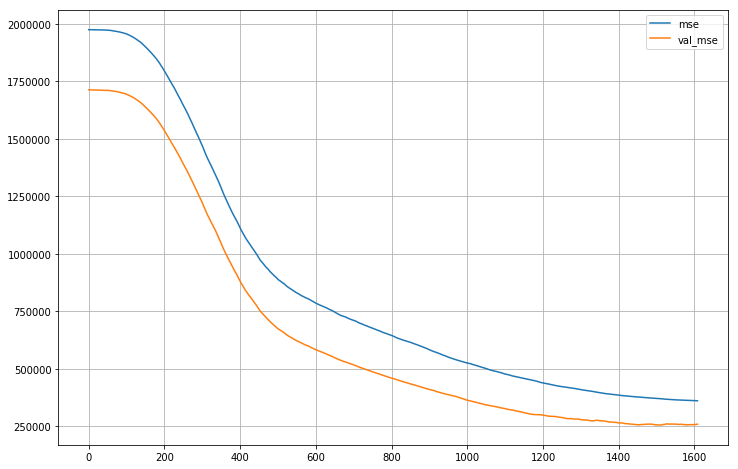

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
# 훈련 데이터의 mse
plt.plot(history.history['mean_squared_error'])
# 검증 데이터의 mse
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['mse','val_mse'])
plt.grid()
plt.show()


In [29]:
pd.DataFrame(history.history)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,1.974186e+06,1123.461060,1.974186e+06,1.712662e+06,1085.536011,1.712662e+06
1,1.974140e+06,1123.437622,1.974140e+06,1.712623e+06,1085.514404,1.712623e+06
2,1.974096e+06,1123.414185,1.974096e+06,1.712584e+06,1085.493408,1.712584e+06
3,1.974054e+06,1123.392334,1.974054e+06,1.712547e+06,1085.473267,1.712547e+06
4,1.974012e+06,1123.370850,1.974012e+06,1.712512e+06,1085.453735,1.712512e+06
...,...,...,...,...,...,...
1604,3.616347e+05,419.763031,3.616347e+05,2.588585e+05,443.890442,2.588585e+05
1605,3.614549e+05,419.830017,3.614549e+05,2.592963e+05,444.661255,2.592963e+05
1606,3.613540e+05,419.890045,3.613540e+05,2.595344e+05,445.093994,2.595344e+05
1607,3.612577e+05,419.902557,3.612577e+05,2.595617e+05,445.174011,2.595617e+05


### 6. 모델 추론

In [30]:
loss, mae, mse = model.evaluate(testData_features, testData_label, verbose=0)

W1013 21:16:26.926674 20352 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


In [32]:
np.sqrt(mse)

616.6726

### 7. 예측

In [34]:
test_predictions = model.predict(testData_features).flatten()

# 예측결과 별도 데이터프레임 생성
predictValues = pd.DataFrame(list(test_predictions), columns = ["PREDICT"])

# 예측결과 컬럼 생성
finalResult = pd.concat([testData_all,predictValues],axis=1)
finalResult.head()

W1013 21:16:37.622855 20352 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_YN,PROMOTION_YN,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1148.952881
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1148.952881
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,424.547516
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1742.066406
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1742.066406


### 8. 예측결과 비교 (시각화)

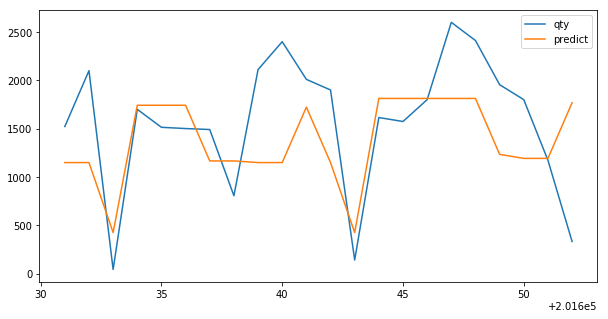

In [35]:
finalResult = finalResult[finalResult.YEARWEEK <= 201652]

import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(finalResult["YEARWEEK"], finalResult.QTY, label = "qty")
plt.plot(finalResult["YEARWEEK"], finalResult.PREDICT, label = "predict")
plt.legend(loc=0)

### 모델 저장 및 재학습

In [36]:
# 모델 저장
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("linear_keras_sellout.h5")

In [37]:
model.save("linear_keras_sellout2.h5")

In [39]:
from tensorflow.keras.models import model_from_json 
json_file = open("model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("linear_keras_sellout.h5") 

In [40]:
#모델 재 컴파일
optimizer= keras.optimizers.Adam()

loaded_model.compile(loss='mean_squared_error',
                     optimizer=optimizer,
                     metrics=['mean_absolute_error','mean_squared_error'])
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [41]:
logdir = os.path.join("logs",datetime.now().strftime("%Y%m%d_%H%M%S"))
logdir

'logs\\20191013_212351'

In [43]:
callback_list = [
    TensorBoard(log_dir=logdir, histogram_freq=1),
    EarlyStopping(monitor="val_loss", patience=100),
    ModelCheckpoint(filepath="./linear_kears.h5",monitor="val_loss", verbose=1)
#     Model
]

In [44]:

#더이상 에러율이 향상되지 않을 시 정지한다, 단 patience 옵션 유지(너무빨리 끝나는거 방지)
early_stopping_monitor = EarlyStopping(patience=50)
EPOCHS = 200
#모델 훈련 (훈련/검증을 80%, 20%로 나눔)
history =loaded_model.fit(trainingData_features,
                   trainingData_label, 
                   validation_split=0.2, epochs= EPOCHS, callbacks=callback_list)

W1013 21:25:24.735092 20352 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 66 samples, validate on 17 samples
Epoch 1/200
32/66 [=============>................] - ETA: 0s - loss: 484120.1875 - mean_absolute_error: 500.5834 - mean_squared_error: 484120.1875
Epoch 00001: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 2ms/sample - loss: 361037.9432 - mean_absolute_error: 419.8192 - mean_squared_error: 361037.9375 - val_loss: 259569.6406 - val_mean_absolute_error: 445.2884 - val_mean_squared_error: 259569.6406
Epoch 2/200
32/66 [=============>................] - ETA: 0s - loss: 347217.8125 - mean_absolute_error: 401.1915 - mean_squared_error: 347217.8125
Epoch 00002: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 571us/sample - loss: 360848.4053 - mean_absolute_error: 419.6711 - mean_squared_error: 360848.4062 - val_loss: 258746.9375 - val_mean_absolute_error: 443.9532 - val_mean_squared_error: 258746.9375
Epoch 3/200
32/66 [=============>................] - ETA: 0s - loss: 408529.1875 - mean_

Epoch 20/200
32/66 [=============>................] - ETA: 0s - loss: 383649.0625 - mean_absolute_error: 420.8542 - mean_squared_error: 383649.0625
Epoch 00020: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 594us/sample - loss: 359926.5263 - mean_absolute_error: 418.6069 - mean_squared_error: 359926.5312 - val_loss: 256132.4062 - val_mean_absolute_error: 439.9212 - val_mean_squared_error: 256132.4062
Epoch 21/200
32/66 [=============>................] - ETA: 0s - loss: 255110.1250 - mean_absolute_error: 355.3682 - mean_squared_error: 255110.1250
Epoch 00021: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 909us/sample - loss: 359869.5095 - mean_absolute_error: 418.5595 - mean_squared_error: 359869.5000 - val_loss: 256063.8281 - val_mean_absolute_error: 439.8171 - val_mean_squared_error: 256063.8281
Epoch 22/200
32/66 [=============>................] - ETA: 0s - loss: 297544.3750 - mean_absolute_error: 404.2473 - mean_squared

Epoch 39/200
32/66 [=============>................] - ETA: 0s - loss: 200478.2031 - mean_absolute_error: 376.6257 - mean_squared_error: 200478.2031
Epoch 00039: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 564us/sample - loss: 358877.7249 - mean_absolute_error: 418.6577 - mean_squared_error: 358877.7188 - val_loss: 258208.1250 - val_mean_absolute_error: 443.5699 - val_mean_squared_error: 258208.1250
Epoch 40/200
32/66 [=============>................] - ETA: 0s - loss: 300541.6562 - mean_absolute_error: 407.6415 - mean_squared_error: 300541.6562
Epoch 00040: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 541us/sample - loss: 358851.8436 - mean_absolute_error: 418.5777 - mean_squared_error: 358851.8438 - val_loss: 257884.3750 - val_mean_absolute_error: 443.0504 - val_mean_squared_error: 257884.3750
Epoch 41/200
32/66 [=============>................] - ETA: 0s - loss: 256645.5312 - mean_absolute_error: 339.6430 - mean_squared

Epoch 58/200
32/66 [=============>................] - ETA: 0s - loss: 477197.5312 - mean_absolute_error: 493.9450 - mean_squared_error: 477197.5312
Epoch 00058: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 519us/sample - loss: 358046.7383 - mean_absolute_error: 417.1370 - mean_squared_error: 358046.7188 - val_loss: 253795.2969 - val_mean_absolute_error: 436.4175 - val_mean_squared_error: 253795.2969
Epoch 59/200
32/66 [=============>................] - ETA: 0s - loss: 512219.0000 - mean_absolute_error: 477.9307 - mean_squared_error: 512219.0000
Epoch 00059: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 609us/sample - loss: 357980.2547 - mean_absolute_error: 417.1482 - mean_squared_error: 357980.2812 - val_loss: 253889.2656 - val_mean_absolute_error: 436.5920 - val_mean_squared_error: 253889.2656
Epoch 60/200
32/66 [=============>................] - ETA: 0s - loss: 407139.8125 - mean_absolute_error: 458.0788 - mean_squared

Epoch 77/200
32/66 [=============>................] - ETA: 0s - loss: 141570.0000 - mean_absolute_error: 305.9043 - mean_squared_error: 141570.0000
Epoch 00077: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 661us/sample - loss: 356472.9804 - mean_absolute_error: 417.1191 - mean_squared_error: 356472.9688 - val_loss: 256983.7031 - val_mean_absolute_error: 441.7930 - val_mean_squared_error: 256983.7031
Epoch 78/200
32/66 [=============>................] - ETA: 0s - loss: 175109.8125 - mean_absolute_error: 335.5721 - mean_squared_error: 175109.8125
Epoch 00078: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 616us/sample - loss: 356406.5582 - mean_absolute_error: 417.1120 - mean_squared_error: 356406.5312 - val_loss: 257183.2031 - val_mean_absolute_error: 442.1143 - val_mean_squared_error: 257183.2031
Epoch 79/200
32/66 [=============>................] - ETA: 0s - loss: 255224.5625 - mean_absolute_error: 353.5189 - mean_squared

Epoch 96/200
32/66 [=============>................] - ETA: 0s - loss: 355894.8125 - mean_absolute_error: 418.9164 - mean_squared_error: 355894.8125
Epoch 00096: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 549us/sample - loss: 355237.1477 - mean_absolute_error: 417.2949 - mean_squared_error: 355237.1562 - val_loss: 261966.3281 - val_mean_absolute_error: 449.3810 - val_mean_squared_error: 261966.3281
Epoch 97/200
32/66 [=============>................] - ETA: 0s - loss: 541158.0000 - mean_absolute_error: 490.5493 - mean_squared_error: 541158.0000
Epoch 00097: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 541us/sample - loss: 355093.5848 - mean_absolute_error: 417.3552 - mean_squared_error: 355093.5625 - val_loss: 262372.3438 - val_mean_absolute_error: 449.9704 - val_mean_squared_error: 262372.3438
Epoch 98/200
32/66 [=============>................] - ETA: 0s - loss: 449648.0312 - mean_absolute_error: 474.3073 - mean_squared

Epoch 115/200
32/66 [=============>................] - ETA: 0s - loss: 336475.5000 - mean_absolute_error: 456.8135 - mean_squared_error: 336475.5000
Epoch 00115: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 579us/sample - loss: 354364.4948 - mean_absolute_error: 418.2196 - mean_squared_error: 354364.5000 - val_loss: 267343.1250 - val_mean_absolute_error: 456.8693 - val_mean_squared_error: 267343.1250
Epoch 116/200
32/66 [=============>................] - ETA: 0s - loss: 531732.6875 - mean_absolute_error: 505.5747 - mean_squared_error: 531732.6875
Epoch 00116: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 511us/sample - loss: 354273.7850 - mean_absolute_error: 418.1143 - mean_squared_error: 354273.7500 - val_loss: 267182.6875 - val_mean_absolute_error: 456.6221 - val_mean_squared_error: 267182.6875
Epoch 117/200
32/66 [=============>................] - ETA: 0s - loss: 459171.8438 - mean_absolute_error: 516.0884 - mean_squa

Epoch 134/200
32/66 [=============>................] - ETA: 0s - loss: 291318.6875 - mean_absolute_error: 396.0707 - mean_squared_error: 291318.6875
Epoch 00134: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 624us/sample - loss: 353559.0851 - mean_absolute_error: 416.6679 - mean_squared_error: 353559.0938 - val_loss: 262565.9688 - val_mean_absolute_error: 449.7223 - val_mean_squared_error: 262565.9688
Epoch 135/200
32/66 [=============>................] - ETA: 0s - loss: 223241.4375 - mean_absolute_error: 322.2294 - mean_squared_error: 223241.4375
Epoch 00135: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 534us/sample - loss: 353544.6785 - mean_absolute_error: 416.6526 - mean_squared_error: 353544.6562 - val_loss: 262615.4062 - val_mean_absolute_error: 449.7917 - val_mean_squared_error: 262615.4062
Epoch 136/200
32/66 [=============>................] - ETA: 0s - loss: 238676.3906 - mean_absolute_error: 321.4278 - mean_squa

Epoch 153/200
32/66 [=============>................] - ETA: 0s - loss: 294676.0000 - mean_absolute_error: 415.6768 - mean_squared_error: 294676.0000
Epoch 00153: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 631us/sample - loss: 353090.0038 - mean_absolute_error: 417.0472 - mean_squared_error: 353090.0000 - val_loss: 265743.1562 - val_mean_absolute_error: 454.0647 - val_mean_squared_error: 265743.1562
Epoch 154/200
32/66 [=============>................] - ETA: 0s - loss: 505357.4375 - mean_absolute_error: 541.9347 - mean_squared_error: 505357.4375
Epoch 00154: saving model to ./linear_kears.h5
66/66 [==============================] - 0s 609us/sample - loss: 353162.8301 - mean_absolute_error: 417.2375 - mean_squared_error: 353162.8125 - val_loss: 266492.2500 - val_mean_absolute_error: 455.0785 - val_mean_squared_error: 266492.2500
Epoch 155/200
32/66 [=============>................] - ETA: 0s - loss: 569917.9375 - mean_absolute_error: 545.9840 - mean_squa

In [45]:
test_predictions = model.predict(testData_features).flatten()

# 예측결과 별도 데이터프레임 생성
predictValues = pd.DataFrame(list(test_predictions), columns = ["PREDICT"])

# 예측결과 컬럼 생성
finalResult = pd.concat([testData_all,predictValues],axis=1)
finalResult.head()

W1013 21:25:41.077194 20352 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_YN,PROMOTION_YN,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1148.952881
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1148.952881
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,424.547516
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1742.066406
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1742.066406


In [46]:
finalResult = finalResult[finalResult.YEARWEEK <= 201652]

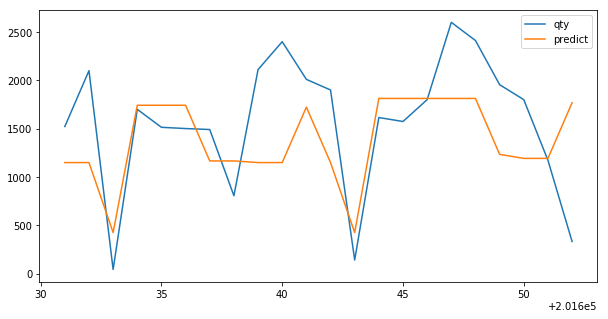

In [47]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,5))
plt.plot(finalResult["YEARWEEK"], finalResult.QTY, label = "qty")
plt.plot(finalResult["YEARWEEK"], finalResult.PREDICT, label = "predict")
plt.legend(loc=0)